In [1]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['Хорошее', 'Благоприятная'] for i in range(12)] + \
        [['Хорошее', 'Напряженная'] for i in range(48)] + \
        [['Хорошее', 'Взрывоопасная критическа'] for i in range(47)] + \
        [['Среднее', 'Благоприятная'] for i in range(20)] + \
        [['Среднее', 'Напряженная'] for i in range(478)] + \
        [['Среднее', 'Взрывоопасная критическа'] for i in range(666)] + \
        [['Плохое', 'Благоприятная'] for i in range(11)] + \
        [['Плохое', 'Напряженная'] for i in range(160)] + \
        [['Плохое', 'Взрывоопасная критическа'] for i in range(701)]
df = pd.DataFrame(data, columns = ['A', 'B']) 

In [2]:
data_crosstab = pd.crosstab(df['A'],
                            df['B'],
                           margins=True, margins_name="Total")

In [3]:
data_crosstab

B,Благоприятная,Взрывоопасная критическа,Напряженная,Total
A,,,,
Плохое,11,701,160,872
Среднее,20,666,478,1164
Хорошее,12,47,48,107
Total,43,1414,686,2143


In [4]:
alpha = 0.05

chi_square = 0
rows = df['A'].unique()
columns = df['B'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [5]:
chi_square

183.16554258232173

статистику хи-квадрат


In [6]:
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
critical_value

9.487729036781154

P-значение для критерия хи-квадрат Фишера-Пирсона



In [7]:
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
p_value

0.0

HO: для всех i, j P(Ai Bj) = P(Ai) P(Bj) (признаки независимы)
HA: найдутся i*, j* P(Ai* Bj*) ≠ P(Ai*) P(Bj*) (признаки зависимы)



In [8]:
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected"

In [9]:
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 183.16554258232173  and p value is: 0.0
Null Hypothesis is rejected


нормированные коэффициенты связи, основанные на статистике хи-квадрат

kоэффициент среднеквадратической сопряжённости:


In [10]:
x = (chi_square**2/data_crosstab['Total'].max())**0.5
x

3.9566960668598976

коэффициент Пирсона


In [11]:
p = (chi_square**2/(data_crosstab['Total'].max()+chi_square**2))**0.5
p

0.9695151212495482

коэффициент Чупрова



In [12]:
T = (chi_square**2/(data_crosstab['Total'].max()*((len(rows)-1)*(len(columns)-1))**0.5))**0.5
T

2.7978066199707747

коэффициент Крамерa



In [13]:
K = (chi_square**2/(data_crosstab['Total'].max()*min((len(rows)-1),(len(columns)-1))))**0.5
K

2.7978066199707747

меры прогнозы Гутмана
- p1 – вероятность ошибки 1-го прогноза
 - 1-й прогноз – угадывание одного признака без информации о другом

In [14]:
pb1 = 1 - 1414/2143
pb1


0.34017732151189917

In [15]:
pb2 = 1 - (701/2143+666/2143+48/2143)
pb2

0.3397106859542698

In [16]:
y = (pb1-pb2)/pb1
y

0.0013717421124825263

p2 – вероятность ошибки 2-го прогноза

In [17]:
pb1 = 1 - 1164/2143
pb1

0.45683621091927207

In [18]:
pb2=1-(20/2143+701/2143+478/2143)
pb2

0.4405039664022399

In [19]:
y = (pb1-pb2)/pb1
y

0.03575076608784472

## Итог: 
принимается альтернативная гипотеза на уровни значимости 0.05
HA: найдутся i*, j* P(Ai* Bj*) ≠ P(Ai*) P(Bj*) (признаки зависимы)

Задача 1.2

In [20]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['Естественные науки', 'M'] for i in range(168)] + \
        [['Естественные науки', 'Ж'] for i in range(92)] + \
        [['Гуманитарные науки', 'M'] for i in range(85)] + \
        [['Гуманитарные науки', 'Ж'] for i in range(135)] 
       
df = pd.DataFrame(data, columns = ['Специальность', 'Пол']) 

In [21]:
data_crosstab = pd.crosstab(df['Специальность'],
                            df['Пол'],
                           margins=True, margins_name="Total")

In [22]:
data_crosstab

Пол,M,Ж,Total
Специальность,,,
Гуманитарные науки,85,135,220
Естественные науки,168,92,260
Total,253,227,480


In [23]:
alpha = 0.05

chi_square = 0
rows = df['Специальность'].unique()
columns = df['Пол'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [24]:
#статистику хи-квадрат
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
critical_value

3.841458820694124

In [25]:
#P-значение для критерия хи-квадрат Фишера-Пирсона
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
p_value


1.3449004465648784e-08

HO: для всех i, j P(Ai Bj) = P(Ai) P(Bj) (признаки независимы)
HA: найдутся i*, j* P(Ai* Bj*) ≠ P(Ai*) P(Bj*) (признаки зависимы)


In [26]:
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected"

In [27]:
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 32.26535509379269  and p value is: 1.3449004465648784e-08
Null Hypothesis is rejected


In [28]:
#kоэффициент среднеквадратической сопряжённости:
x = (chi_square**2/data_crosstab['Total'].max())**0.5
x

1.4727052342320395

In [29]:
#коэффициент Пирсона
p = (chi_square**2/(data_crosstab['Total'].max()+chi_square**2))**0.5
p

0.8273023456307234

In [30]:
#коэффициент Чупрова
T = (chi_square**2/(data_crosstab['Total'].max()*((len(rows)-1)*(len(columns)-1))**0.5))**0.5
T


1.4727052342320395

In [31]:
#коэффициент Крамерa
K = (chi_square**2/(data_crosstab['Total'].max()*min((len(rows)-1),(len(columns)-1))))**0.5
K


1.4727052342320395

меры прогнозы Гутмана
- p1 – вероятность ошибки 1-го прогноза
 - 1-й прогноз – угадывание одного признака без информации о другом

In [32]:
data_crosstab

Пол,M,Ж,Total
Специальность,,,
Гуманитарные науки,85,135,220
Естественные науки,168,92,260
Total,253,227,480


In [33]:
pb1 = 1 - 253/480
pb1


0.47291666666666665

In [34]:
pb2 = 1 - (168/480+135/480)
pb2

0.36875

In [35]:
y = (pb1-pb2)/pb1
y

0.22026431718061668

– коэффициенты контингенции и ассоциации

In [36]:
data_crosstab

Пол,M,Ж,Total
Специальность,,,
Гуманитарные науки,85,135,220
Естественные науки,168,92,260
Total,253,227,480


In [37]:
#коэффициенты контингенции
f = (85*92-135*168)/((85+135)*(168+92)*(85+168)*(135+92))**0.5
f

-0.2592672169379206

In [38]:
#коэффициенты ассоциации
q = (85*92-135*168)/(85*92+135*168) 
q

-0.48721311475409834

# 2.1 Zadacha

In [39]:
x_simple = pd.DataFrame([(22.49,22.56,23.45,22.58, 24.3, 24.2, 23.47, 23.5, 24.48, 25.02, 23.04, 23.24, 25.2, 24.61, 26.02),
                         (52.93,53.4,53.7, 53.36, 61.8, 55.2, 53.54, 58.33, 60.4, 60.3, 54.28, 53.6, 62.24, 54.45, 61.52)],
                        columns=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"])
x_simple

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,22.49,22.56,23.45,22.58,24.3,24.2,23.47,23.50,24.48,25.02,23.04,23.24,25.20,24.61,26.02
1,52.93,53.40,53.70,53.36,61.8,55.2,53.54,58.33,60.40,60.30,54.28,53.60,62.24,54.45,61.52


In [40]:
x_simplet = x_simple.transpose()

In [41]:
from scipy.stats import spearmanr


In [42]:
corr, pvalue = spearmanr(x_simplet[0], x_simplet[1])


In [43]:
print("Correlation Spearman value:",corr)
print("pvalue Spearman:",pvalue)


Correlation Spearman value: 0.8821428571428571
pvalue Spearman: 1.3558210624788689e-05


In [44]:
chiRes2 = stats.chi2_contingency(x_simplet)


Cramer:

In [45]:
import scipy.stats as stats

In [46]:
tau, p_value = stats.kendalltau(x_simplet[0], x_simplet[1])


In [47]:
tau

0.6952380952380953

In [48]:
pvalue

1.3558210624788689e-05

разбивая диапазон количественных признаков на несколько интервалов строит
по наблюдениям таблицу сопряжённости, вычисляет нормированные коэффициенты
связи (Пирсона, Крамера и др.), меры прогноза Гутмана и P-значение для
критерия хи-квадрат Фишера-Пирсона

In [49]:
x_simplet.columns = ['a', 'b']

In [50]:
import matplotlib.pyplot as plt

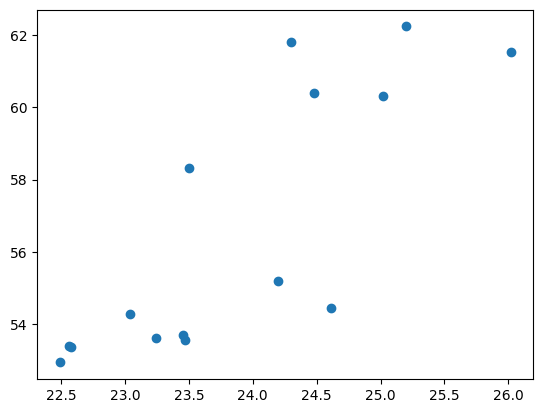

In [51]:
plt.scatter(x_simplet['a'], x_simplet['b'])

In [66]:
conditions  = [(x_simplet['a'] < 23.5), 
               (x_simplet['a'] >= 23.5) & (x_simplet['a']< 25),
               (x_simplet['a'] >= 25)]
    

In [67]:
choices  = [ "a_1", 'a_2', 'a_3']
import numpy as np

In [68]:
x_simplet["a_class"] = np.select(conditions, choices, default=np.nan)


In [69]:
conditions  = [(x_simplet['b'] < 56), 
               (x_simplet['b'] >= 56)]

choices  = [ "b_1", 'b_2']
import numpy as np
    

In [70]:
x_simplet["b_class"] = np.select(conditions, choices, default=np.nan)


In [72]:
data_crosstab = pd.crosstab(x_simplet['a_class'],
                            x_simplet['b_class'],
                           margins=True, margins_name="Total")

In [73]:
data_crosstab

b_class,b_1,b_2,Total
a_class,,,
a_1,7,0,7
a_2,2,3,5
a_3,0,3,3
Total,9,6,15


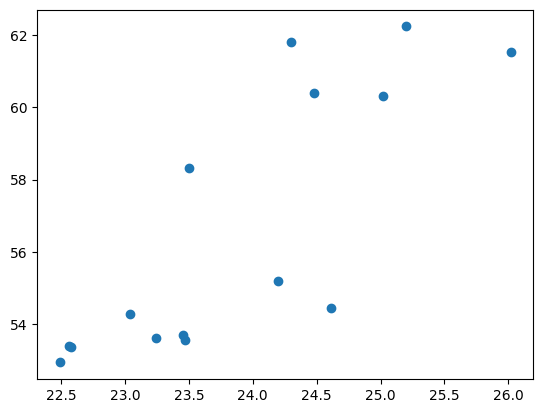

In [74]:
plt.scatter(x_simplet['a'], x_simplet['b'])

In [84]:
alpha = 0.05

chi_square = 0
rows = x_simplet['a_class'].unique()
columns = x_simplet['b_class'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [85]:
chi_square

10.0

In [86]:
#коэффициент Пирсона
p = (chi_square**2/(data_crosstab['Total'].max()+chi_square**2))**0.5
p

0.9325048082403138

In [87]:
#коэффициент Чупрова
T = (chi_square**2/(data_crosstab['Total'].max()*((len(rows)-1)*(len(columns)-1))**0.5))**0.5
T


2.171185208108769

In [88]:
#коэффициент Крамерa
K = (chi_square**2/(data_crosstab['Total'].max()*min((len(rows)-1),(len(columns)-1))))**0.5
K


2.581988897471611

In [89]:
#P-значение для критерия хи-квадрат Фишера-Пирсона
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
p_value


0.006737946999085476

In [90]:
#HO: для всех i, j P(Ai Bj) = P(Ai) P(Bj) (признаки независимы)
#HA: найдутся i*, j* P(Ai* Bj*) ≠ P(Ai*) P(Bj*) (признаки зависимы)
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected"


In [91]:
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 10.0  and p value is: 0.006737946999085476
Null Hypothesis is rejected


# 2.2 Zadacha

In [92]:
x_simple = pd.DataFrame({ 'Годы': [1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936],
                         'Пшеница':[20.1, 23.6, 26.3, 19.9, 16.7, 23.2, 31.4, 33.5, 28.2, 35.3, 29.3],
                         'Картофель':[7.2, 7.1, 7.4, 6.1, 6.0, 7.3, 9.4, 9.2, 8.8, 10.4, 8]
    
    
})
x_simple

,Годы,Пшеница,Картофель
0,1926,20.1,7.2
1,1927,23.6,7.1
2,1928,26.3,7.4
3,1929,19.9,6.1
4,1930,16.7,6.0
5,1931,23.2,7.3
6,1932,31.4,9.4
7,1933,33.5,9.2
8,1934,28.2,8.8
9,1935,35.3,10.4


In [94]:
from scipy.stats import spearmanr
corr, pvalue = spearmanr(x_simple['Пшеница'], x_simple['Картофель'])


In [95]:
print("Correlation Spearman value:",corr)
print("pvalue Spearman:",pvalue)


Correlation Spearman value: 0.9545454545454546
pvalue Spearman: 4.988898739949763e-06


In [96]:
tau, p_value = stats.kendalltau(x_simple['Пшеница'], x_simple['Картофель'])


In [97]:
print("Correlation kendall value:",tau)
print("pvalue Spearman:",pvalue)


Correlation kendall value: 0.8545454545454545
pvalue Spearman: 4.988898739949763e-06


разбивая диапазон количественных признаков на несколько интервалов строит
по наблюдениям таблицу сопряжённости, вычисляет нормированные коэффициенты
связи (Пирсона, Крамера и др.), меры прогноза Гутмана и P-значение для
критерия хи-квадрат Фишера-Пирсона

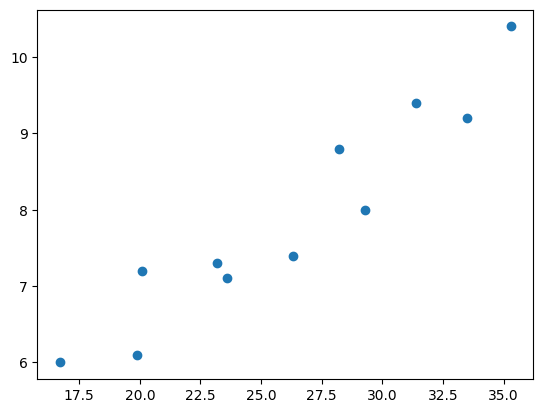

In [98]:
plt.scatter(x_simple['Пшеница'], x_simple['Картофель'])

In [100]:
conditions  = [(x_simple['Пшеница'] < 23.5), 
               (x_simple['Пшеница'] >= 23.5)]
    

In [101]:
choices  = [ "a_1", 'a_2']
import numpy as np

In [102]:
x_simple["a_class"] = np.select(conditions, choices, default=np.nan)


In [105]:
conditions  = [(x_simple['Картофель'] < 7.5), 
               (x_simple['Картофель'] >= 7.5)]

choices  = [ "b_1", 'b_2']
import numpy as np
    

In [106]:
x_simple["b_class"] = np.select(conditions, choices, default=np.nan)


In [107]:
x_simple

,Годы,Пшеница,Картофель,a_class,b_class
0,1926,20.1,7.2,a_1,b_1
1,1927,23.6,7.1,a_2,b_1
2,1928,26.3,7.4,a_2,b_1
3,1929,19.9,6.1,a_1,b_1
4,1930,16.7,6.0,a_1,b_1
5,1931,23.2,7.3,a_1,b_1
6,1932,31.4,9.4,a_2,b_2
7,1933,33.5,9.2,a_2,b_2
8,1934,28.2,8.8,a_2,b_2
9,1935,35.3,10.4,a_2,b_2


In [110]:
data_crosstab = pd.crosstab(x_simple['a_class'],
                            x_simple['b_class'],
                           margins=True, margins_name="Total")

In [113]:
alpha = 0.05

chi_square = 0
rows = x_simple['a_class'].unique()
columns = x_simple['b_class'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [114]:
chi_square

5.238095238095239

In [115]:
#коэффициент Пирсона
p = (chi_square**2/(data_crosstab['Total'].max()+chi_square**2))**0.5
p

0.8448799875609089

In [116]:
#коэффициент Чупрова
T = (chi_square**2/(data_crosstab['Total'].max()*((len(rows)-1)*(len(columns)-1))**0.5))**0.5
T


1.5793451382644763

In [117]:
#коэффициент Крамерa
K = (chi_square**2/(data_crosstab['Total'].max()*min((len(rows)-1),(len(columns)-1))))**0.5
K


1.5793451382644763

In [118]:
#P-значение для критерия хи-квадрат Фишера-Пирсона
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
p_value


0.02209745528422724

In [119]:
#HO: для всех i, j P(Ai Bj) = P(Ai) P(Bj) (признаки независимы)
#HA: найдутся i*, j* P(Ai* Bj*) ≠ P(Ai*) P(Bj*) (признаки зависимы)
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected"


In [120]:
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 5.238095238095239  and p value is: 0.02209745528422724
Null Hypothesis is rejected
